# Black Sea Data Cube Usage

This notebook provides a simple usage example of the Black Sea Data Cube. It is structured as follows:

- **Imports**: libraries to use.
- **Data store**: includes the data store creation from the DeepESDL S3 bucket.
- **Open data cube**: shows how to open the data cube and displays the `xarray.Dataset`.
- **Display global attributes**: shows the global attributes of the data cube.
- **Display variable attributes**: shows variable-specific attributes for an example variable.
- **Plot an example date**: subplots for each variable on a specific example date.
- **Plot a time series**: displays the plot of a time series for an example variable.

## Imports

In [1]:
import xarray as xr
from xcube.core.store import new_data_store
import matplotlib.pyplot as plt

## Data store

In [2]:
store_output = new_data_store('s3', root='deep-esdl-output')

## Open data cube

In [3]:
bs = store_output.open_data('black-sea-256x128x128.zarr')
bs

,Array,Chunk
Bytes,43.57 GiB,16.00 MiB
Shape,"(731, 3000, 5333)","(256, 128, 128)"
Count,3025 Tasks,3024 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,43.57 GiB,16.00 MiB
Shape,"(731, 3000, 5333)","(256, 128, 128)"
Count,3025 Tasks,3024 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


## Display global attributes

In [10]:
bs.attrs

{'Conventions': 'CF-1.9',
 'acknowledgment': 'EO4SIBS, CMEMS, DeepESDL project',
 'contributor_name': 'Brockmann Geomatics Sweden AB',
 'contributor_url': 'www.brockmann-geomatics.se',
 'creator_email': 'info@brockmann-consult.de',
 'creator_name': 'Brockmann Consult GmbH',
 'creator_url': 'www.brockmann-consult.de',
 'date_modified': '2022-08-19 16:19:15.359970',
 'geospatial_lat_max': 47.9985,
 'geospatial_lat_min': 39.001500000000156,
 'geospatial_lat_resolution': 0.0030000000000001137,
 'geospatial_lon_max': 41.997499999999725,
 'geospatial_lon_min': 26.0015,
 'geospatial_lon_resolution': 0.0030000000000001137,
 'id': 'black-sea-256x256x256',
 'institution': 'Brockmann Consult GmbH',
 'license': 'Terms and conditions of the DeepESDL data distribution',
 'project': 'DeepESDL',
 'publisher_email': 'info@brockmann-consult.de',
 'publisher_name': 'Brockmann Consult GmbH',
 'publisher_url': 'www.brockmann-consult.de',
 'source': 'EO4SIBS, CMEMS',
 'time_coverage_end': '2017-12-31T00:00:

## Display variable attributes

In [11]:
bs.sss.attrs

{'grid_mapping': 'crs',
 'long_name': 'Sea Surface Salinity',
 'processing_level': 'L3',
 'references': 'http://www.eo4sibs.uliege.be/doc/EO4SIBS_DUM_ATBD_Salinity.pdf',
 'source': 'EO4SIBS, Level 3 SSS, 0.25°*0.25°, 9-day averaged produced daily',
 'standard_name': 'sea_surface_salinity',
 'units': 'psu'}

## Plot an example date

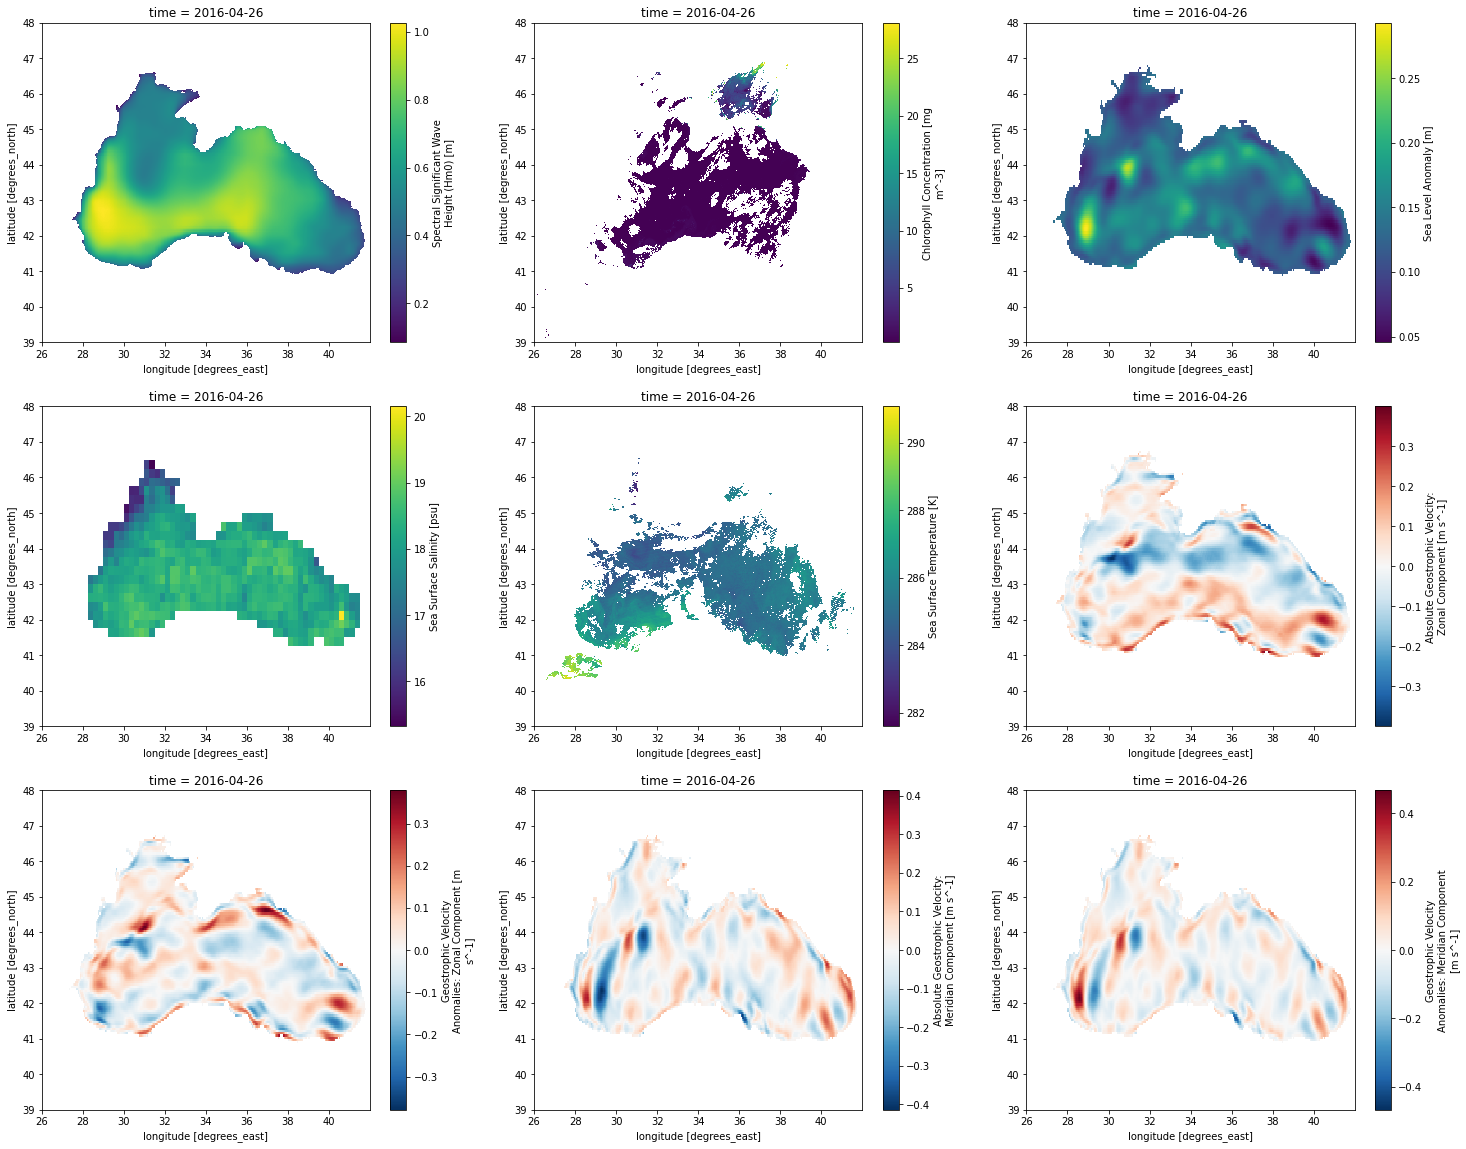

In [4]:
variables = list(bs.variables)
[variables.remove(x) for x in ["lat","lon","time","crs"]]

fig, axs = plt.subplots(3,3,figsize = (25,20))

date_to_plot = "2016-04-26"

counter = 0
for i in range(3):
    for j in range(3):
        bs[variables[counter]].sel(time = date_to_plot).plot(ax = axs[i,j])
        counter += 1

## Plot a time series

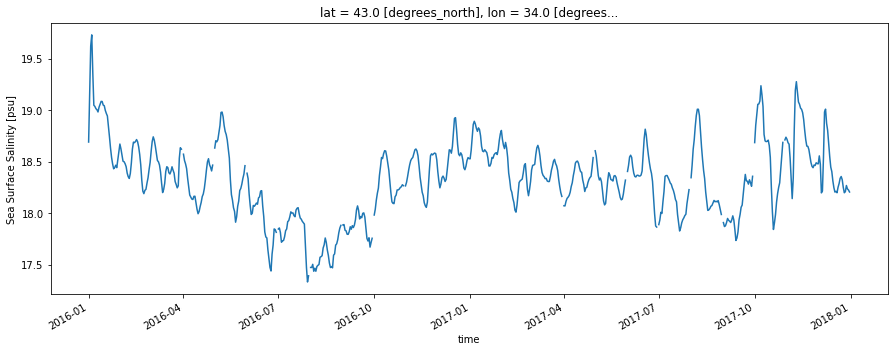

In [9]:
bs.sss.sel(lat = 43,lon = 34,method = "nearest").plot(figsize = (15,5))